## Instructions to use Tao plot ( skip if you do not need Tao plot )

###### To use Tao plot, `Xquartz` is required.
###### https://www.xquartz.org

###### `Xcode` might be additionally required.
###### Detialed instructions are at:
##### https://wiki.classe.cornell.edu/ACC/ACL/OffsiteDoc#DistDownload



## Tao initialization

In [146]:
from pytao import Tao

In [153]:
# This activates tao, and a plot window (with Xquartz) should pop up.
# If this crashes the kernel, try with -noplot option below, or follow the instructions above.
tao = Tao('-init tao.init')

#tao = Tao('-init tao.init -noplot')

## Run Tao commands 
#### Note that `cmd` takes one while `cmds` takes a list of many
#### These commands can be run using vanilla tao in a terminal

In [8]:
tao.cmd('show lat 1:3 -at beta_a')

['# Values shown are for the Exit End of each Element:',
 '# Index  name    key                      s       l      beta_a',
 '      1  MAR.BEG Marker               0.000   0.000  5.0000E+00',
 '      2  P1      Pipe                 1.000   1.000  5.2000E+00',
 '      3  B1      Sbend                1.200   0.200  5.1295E+00',
 '# Index  name    key                      s       l      beta_a',
 '# Values shown are for the Exit End of each Element:']

In [52]:
tao.cmds(['show ele 2:3; sho lat 5:6 -at key'])

[['',
  '\x1bTao\x1b: show ele 2:3',
  '         2  P1                                               1.000',
  '         3  B1                                               1.200',
  'Number of Matches: 2',
  '',
  '\x1bTao\x1b: sho lat 5:6 -at key',
  '# Values shown are for the Exit End of each Element:',
  '# Index  name  key                      s       l  key',
  '      5  P2\\Q1 Quadrupole           1.550   0.100  Quadrupole',
  '      6  P2#2  Pipe                 1.850   0.300  Pipe',
  '# Index  name  key                      s       l  key',
  '# Values shown are for the Exit End of each Element:']]

## Tao magic
#### The `%%tao` header allows the commands to run cleanly
#### Note that commenting in Tao use `!`, not `#`

In [27]:
%%tao
sho lat -s 1.5:2.3 -at eta_x

-------------------------
Tao> sho lat -s 1.5:2.3 -at eta_x
# Values shown are for the Exit End of each Element:
# Index  name  key                      s       l       eta_x
      5  P2\Q1 Quadrupole           1.550   0.100  7.9123E-02
      6  P2#2  Pipe                 1.850   0.300  1.3202E-01
      7  P2\Q2 Quadrupole           1.950   0.100  1.4965E-01
      8  P2#3  Pipe                 2.200   0.250  1.9374E-01
# Index  name  key                      s       l       eta_x
# Values shown are for the Exit End of each Element:
-------------------------
Tao> 


### Try the following commands 
##### Uncomment by removing the `!`

In [156]:
%%tao
!sho lat -lords quad::* -at l
!sho lat -no_label_lines -tracking_elements B* -at b_field
!sho -write ele_3.dat ele 3 
!sho mat 1 3 
!sho uni
!sho global

-------------------------
Tao> !sho lat -lords quad::* -at l
-------------------------
Tao> !sho lat -no_label_lines -tracking_elements B* -at b_field
-------------------------
Tao> !sho -write ele_3.dat ele 3 
-------------------------
Tao> !sho mat 1 3 
-------------------------
Tao> !sho uni
-------------------------
Tao> !sho global
-------------------------
Tao> 


#### useful alias ( user can define more in `tao.startup` )

In [157]:
%%tao
alias

-------------------------
Tao> alias
vim                                     sp vim [[1]]
view                                    set default uni = [[1]]
vv                                      veto var *
vd                                      veto dat *@*
vk                                      set var *|key_bound = F
ode                                     set global optimizer = de
olm                                     set global optimizer = lm
osvd                                    set global optimizer = svd
olmdif                                  set global optimizer = lmdif
ogeo                                    set global optimizer = geodesic_lm
sgeo                                    set geodesic_lm
scycles                                 set global n_opti_cycles = [[1]]
sloops                                  set global n_opti_loops = [[1]]
sde                                     set global de_lm_step_ratio = [[1]]
spop                                    set global de_var_

## Tao method commands
#### These give clean parsing and further data processing

In [63]:
tao.orbit_at_s(s_offset=1.5)

{'x': 0.0,
 'px': 0.0,
 'y': 0.0,
 'py': 0.0,
 'z': 0.0,
 'pz': 0.0,
 'spin': array([0., 0., 0.]),
 'field': array([0., 0.]),
 'phase': array([0., 0.]),
 's': 1.5,
 't': 5.01000676656434e-09,
 'charge': 0.0,
 'dt_ref': 0.0,
 'p0c': 9986935.46955716,
 'beta': 0.998693546955716,
 'ix_ele': 5,
 'state': 'Alive',
 'direction': 1,
 'species': 'Positron',
 'location': 'Inside'}

In [60]:
tao.evaluate('data::twiss.end[1:6]|model')

array([ 1.18923327e+01, -1.17408115e+00,  1.74447511e+00, -4.70463955e-01,
       -1.38777878e-16,  0.00000000e+00])

In [155]:
tao.cmd('set ele Q1 k1=3.3')
tao.evaluate('var::quad[1:6]|model')

array([3.3, 0. , 0. , 0. , 0. , 0. ])

In [64]:
s = tao.lat_list('*', 'ele.s', verbose=True)
s[0:5]

python lat_list -array_out -track_only @>>*|model ele.s


array([0.  , 0.  , 1.  , 1.2 , 1.45])

In [65]:
names = tao.lat_list('*', 'ele.name')
names[0:5]

['BEGINNING', 'MAR.BEG', 'P1', 'B1', 'P2#1']

Text(0, 0.5, '$\\eta_x$ (m)')

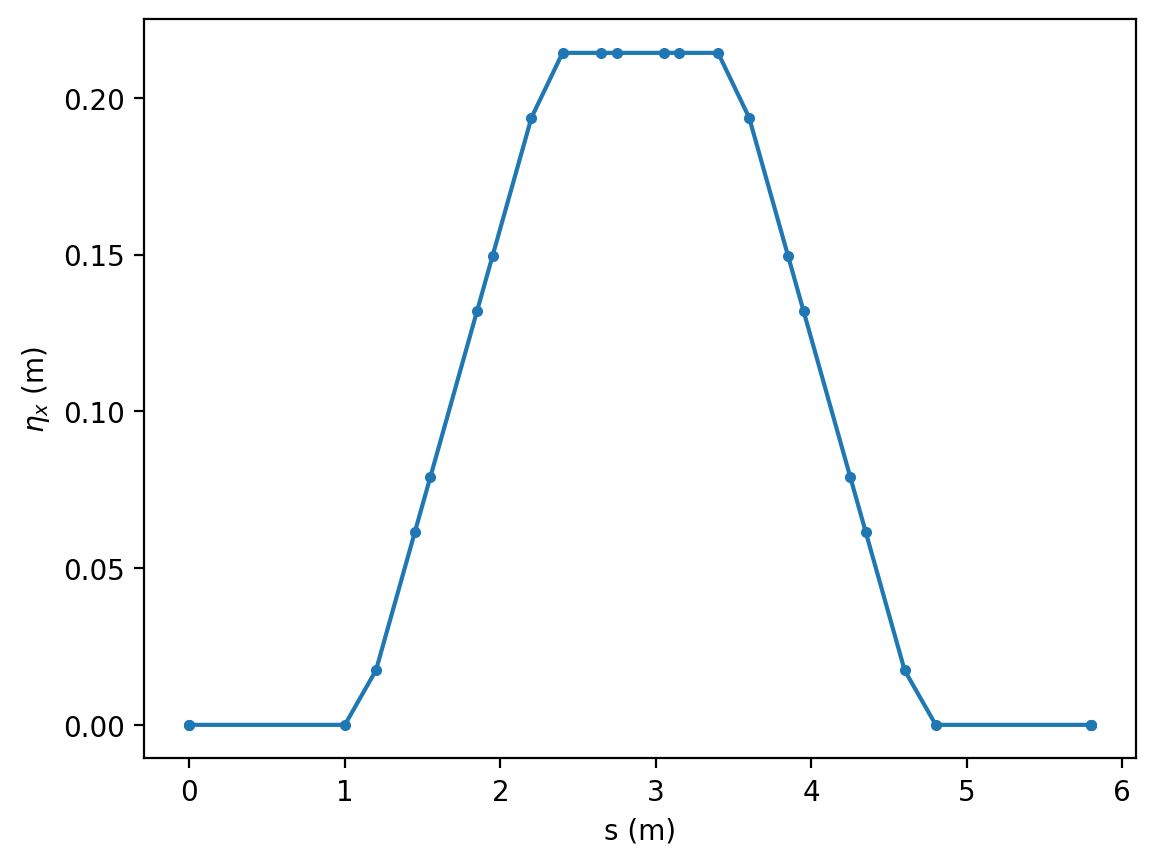

In [77]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

plt.plot(
    tao.lat_list('*', 'ele.s'),
    tao.lat_list('*', 'ele.a.eta'),
    marker='.'
)

plt.xlabel('s (m)')
plt.ylabel(r'$\eta_x$ (m)')

## Other useful commands

In [75]:
from pytao import interface_commands
all_cmds = [name for name in dir(interface_commands) if not name.startswith('__')]
print(all_cmds)

['beam', 'beam_init', 'bmad_com', 'branch1', 'building_wall_graph', 'building_wall_list', 'building_wall_point', 'building_wall_section', 'bunch1', 'bunch_comb', 'bunch_params', 'constraints', 'da_aperture', 'da_params', 'data', 'data_d1_array', 'data_d2', 'data_d2_array', 'data_d2_create', 'data_d2_destroy', 'data_d_array', 'data_parameter', 'data_set_design_value', 'datum_create', 'datum_has_ele', 'derivative', 'ele_ac_kicker', 'ele_cartesian_map', 'ele_chamber_wall', 'ele_control_var', 'ele_cylindrical_map', 'ele_elec_multipoles', 'ele_floor', 'ele_gen_attribs', 'ele_grid_field', 'ele_head', 'ele_lord_slave', 'ele_mat6', 'ele_methods', 'ele_multipoles', 'ele_orbit', 'ele_param', 'ele_photon', 'ele_spin_taylor', 'ele_taylor', 'ele_taylor_field', 'ele_twiss', 'ele_wake', 'ele_wall3d', 'em_field', 'enum', 'evaluate', 'floor_orbit', 'floor_plan', 'help', 'inum', 'lat_branch_list', 'lat_calc_done', 'lat_ele_list', 'lat_list', 'lat_param_units', 'matrix', 'merit', 'orbit_at_s', 'parse_tao